In [1]:

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings globally
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from mapping import (
    compute_area_scores
)

from alex_extractor import build_alexnet_design_matrices_with_dataloader

from plotter import plot_comparison

import pandas as pd

IMAGE_FOLDER = "../Preproc2/images/"
NUM_WORKERS = 15
METRIC = "PLS"


# Mouse-vision style parameters (for final results)
# N_BOOT = 100  # n_iter in mouse-vision
# N_SPLITS = 10  # num_splits in mouse-vision
# PLS_N_COMPONENTS = 25

N_BOOT = 5
N_SPLITS = 5
PLS_N_COMPONENTS = 25

LAYERS_KEEP = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6", "fc7"]

# Passing the stimuli to AlexNet and extracting activations

The idea is to use a pretrained model (AlexNet) to extract features from the stimuli images, and then use these features to predict neural responses. 

Using the formalism discussed in the [neural_to_neural.ipynb](neural_to_neural.ipynb) notebook, we can think of the model as a "source" and the neural data as a "target". We will compute the similarity between the model's representation and the neural representation using the same metrics as before (RSA, CKA, PLS).

Here the design matrices of the AlexNet representation do not have trials, to the splits (required for the reliability computation in the corrected similarity version) are performed only on the neural data.

In [2]:
index_model_random = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="random",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-random",
    return_in_memory=False
)

In [3]:
index_model_inet_no_diet = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/supervised_no-diet/20250915_023037_sgd/checkpoint_epoch_60.pth",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-supervised-no-diet",
    return_in_memory=False
)

In [4]:
index_model_inet_diet = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/supervised_diet/20250930_022201_no-aug/checkpoint_epoch_60.pth",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-supervised-diet",
    return_in_memory=False
)

In [5]:
index_model_inet_ss_no_diet = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/self-supervised_no-diet/20250922_144504_warmup+dynamic/checkpoint_epoch_60.pth",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-self-supervised-no-diet",
    return_in_memory=False
)

In [6]:
index_model_inet_ss_diet = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/self-supervised_diet/20250929_010742_warmup+dynamic/checkpoint_epoch_60.pth",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-self-supervised-diet",
    return_in_memory=False
)

In [7]:
index_model_inet = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="ImageNet",
    device="cuda",
    amp=True,
    layers_keep=LAYERS_KEEP,
    save_dir="alex-matrices-Inet",
    return_in_memory=False
)

Loading the index file with paths to neural data

In [8]:
index_df = pd.read_csv('../Preproc2/data/combined_index.csv')

In [9]:
# random
layer_scores_random, median_scores_random = compute_area_scores(
    index_model_random,
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='random'
)

Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.2817
Layer: conv1, Area: VISal, Specimen: 738651054, Score: 0.3077
Layer: conv1, Area: VISal, Specimen: 739783171, Score: 0.3104
Layer: conv1, Area: VISal, Specimen: 742714475, Score: 0.2807
Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.3098
Layer: conv1, Area: VISal, Specimen: 775876828, Score: 0.1917
Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.3768
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.2519
Layer: conv1, Area: VISam, Specimen: 738651054, Score: 0.2421
Layer: conv1, Area: VISam, Specimen: 739783171, Score: 0.2757
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.3291
Layer: conv1, Area: VISam, Specimen: 744915204, Score: 0.1818
Layer: conv1, Area: VISam, Specimen: 775876828, Score: 0.1396
Layer: conv1, Area: VISl, Specimen: 716813543, Score: 0.2076
Layer: conv1, Area: VISl, Specimen: 723627604, Score: 0.1545
Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.3049
Layer: conv

In [10]:
# inet no diet
layer_scores_inet_no_diet, median_scores_inet_no_diet = compute_area_scores(
    index_model_inet_no_diet,
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='supervised_no-diet'
)

Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.2871
Layer: conv1, Area: VISal, Specimen: 738651054, Score: 0.3051
Layer: conv1, Area: VISal, Specimen: 739783171, Score: 0.3088
Layer: conv1, Area: VISal, Specimen: 742714475, Score: 0.2726
Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.3136
Layer: conv1, Area: VISal, Specimen: 775876828, Score: 0.1927
Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.3589
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.2537
Layer: conv1, Area: VISam, Specimen: 738651054, Score: 0.2312
Layer: conv1, Area: VISam, Specimen: 739783171, Score: 0.2875
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.3475
Layer: conv1, Area: VISam, Specimen: 744915204, Score: 0.1710
Layer: conv1, Area: VISam, Specimen: 775876828, Score: 0.1411
Layer: conv1, Area: VISl, Specimen: 716813543, Score: 0.2212
Layer: conv1, Area: VISl, Specimen: 723627604, Score: 0.1725
Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.3068
Layer: conv

In [11]:
# inet diet
layer_scores_inet_diet, median_scores_inet_diet = compute_area_scores(
    index_model_inet_diet,
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='supervised_diet'
)

Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.2829
Layer: conv1, Area: VISal, Specimen: 738651054, Score: 0.3066
Layer: conv1, Area: VISal, Specimen: 739783171, Score: 0.3062
Layer: conv1, Area: VISal, Specimen: 742714475, Score: 0.2633
Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.2984
Layer: conv1, Area: VISal, Specimen: 775876828, Score: 0.2030
Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.3731
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.2533
Layer: conv1, Area: VISam, Specimen: 738651054, Score: 0.2427
Layer: conv1, Area: VISam, Specimen: 739783171, Score: 0.2880
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.3319
Layer: conv1, Area: VISam, Specimen: 744915204, Score: 0.1729
Layer: conv1, Area: VISam, Specimen: 775876828, Score: 0.1371
Layer: conv1, Area: VISl, Specimen: 716813543, Score: 0.2080
Layer: conv1, Area: VISl, Specimen: 723627604, Score: 0.1537
Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.3157
Layer: conv

In [12]:
# inet ss no diet
layer_scores_inet_ss_no_diet, median_scores_inet_ss_no_diet = compute_area_scores(
    index_model_inet_ss_no_diet,
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='self-supervised_no-diet'
)

Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.2851
Layer: conv1, Area: VISal, Specimen: 738651054, Score: 0.2931
Layer: conv1, Area: VISal, Specimen: 739783171, Score: 0.2861
Layer: conv1, Area: VISal, Specimen: 742714475, Score: 0.2651
Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.2861
Layer: conv1, Area: VISal, Specimen: 775876828, Score: 0.2000
Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.3839
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.2457
Layer: conv1, Area: VISam, Specimen: 738651054, Score: 0.2581
Layer: conv1, Area: VISam, Specimen: 739783171, Score: 0.2900
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.3163
Layer: conv1, Area: VISam, Specimen: 744915204, Score: 0.1926
Layer: conv1, Area: VISam, Specimen: 775876828, Score: 0.1115
Layer: conv1, Area: VISl, Specimen: 716813543, Score: 0.2102
Layer: conv1, Area: VISl, Specimen: 723627604, Score: 0.1685
Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.3052
Layer: conv

In [13]:
# inet ss diet
layer_scores_inet_ss_diet, median_scores_inet_ss_diet = compute_area_scores(
    index_model_inet_ss_diet,
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='self-supervised_diet'
)

Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.2982
Layer: conv1, Area: VISal, Specimen: 738651054, Score: 0.3104
Layer: conv1, Area: VISal, Specimen: 739783171, Score: 0.3152
Layer: conv1, Area: VISal, Specimen: 742714475, Score: 0.2720
Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.3031
Layer: conv1, Area: VISal, Specimen: 775876828, Score: 0.2030
Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.3555
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.2531
Layer: conv1, Area: VISam, Specimen: 738651054, Score: 0.2247
Layer: conv1, Area: VISam, Specimen: 739783171, Score: 0.2722
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.3322
Layer: conv1, Area: VISam, Specimen: 744915204, Score: 0.1687
Layer: conv1, Area: VISam, Specimen: 775876828, Score: 0.1461
Layer: conv1, Area: VISl, Specimen: 716813543, Score: 0.2179
Layer: conv1, Area: VISl, Specimen: 723627604, Score: 0.1606
Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.2980
Layer: conv

In [14]:
# inet
layer_scores_inet, median_scores_inet = compute_area_scores(
    index_model_inet,
    index_df,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    n_components=PLS_N_COMPONENTS,
    model_name='ImportError'
)

Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.2968
Layer: conv1, Area: VISal, Specimen: 738651054, Score: 0.3061
Layer: conv1, Area: VISal, Specimen: 739783171, Score: 0.2909
Layer: conv1, Area: VISal, Specimen: 742714475, Score: 0.2791
Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.2971
Layer: conv1, Area: VISal, Specimen: 775876828, Score: 0.1852
Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.3680
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.2572
Layer: conv1, Area: VISam, Specimen: 738651054, Score: 0.2377
Layer: conv1, Area: VISam, Specimen: 739783171, Score: 0.2865
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.3302
Layer: conv1, Area: VISam, Specimen: 744915204, Score: 0.1738
Layer: conv1, Area: VISam, Specimen: 775876828, Score: 0.1472
Layer: conv1, Area: VISl, Specimen: 716813543, Score: 0.2166
Layer: conv1, Area: VISl, Specimen: 723627604, Score: 0.1660
Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.2983
Layer: conv

In [15]:
#save results [median_scores_random, median_scores_inet, median_scores_inet_no_diet, median_scores_inet_diet, median_scores_inet_ss_no_diet, median_scores_inet_ss_diet]
median_scores_random.to_pickle("median_scores_random.pkl")
median_scores_inet.to_pickle("median_scores_inet.pkl")
median_scores_inet_no_diet.to_pickle("median_scores_inet_no_diet.pkl")
median_scores_inet_diet.to_pickle("median_scores_inet_diet.pkl")
median_scores_inet_ss_no_diet.to_pickle("median_scores_inet_ss_no_diet.pkl")
median_scores_inet_ss_diet.to_pickle("median_scores_inet_ss_diet.pkl")

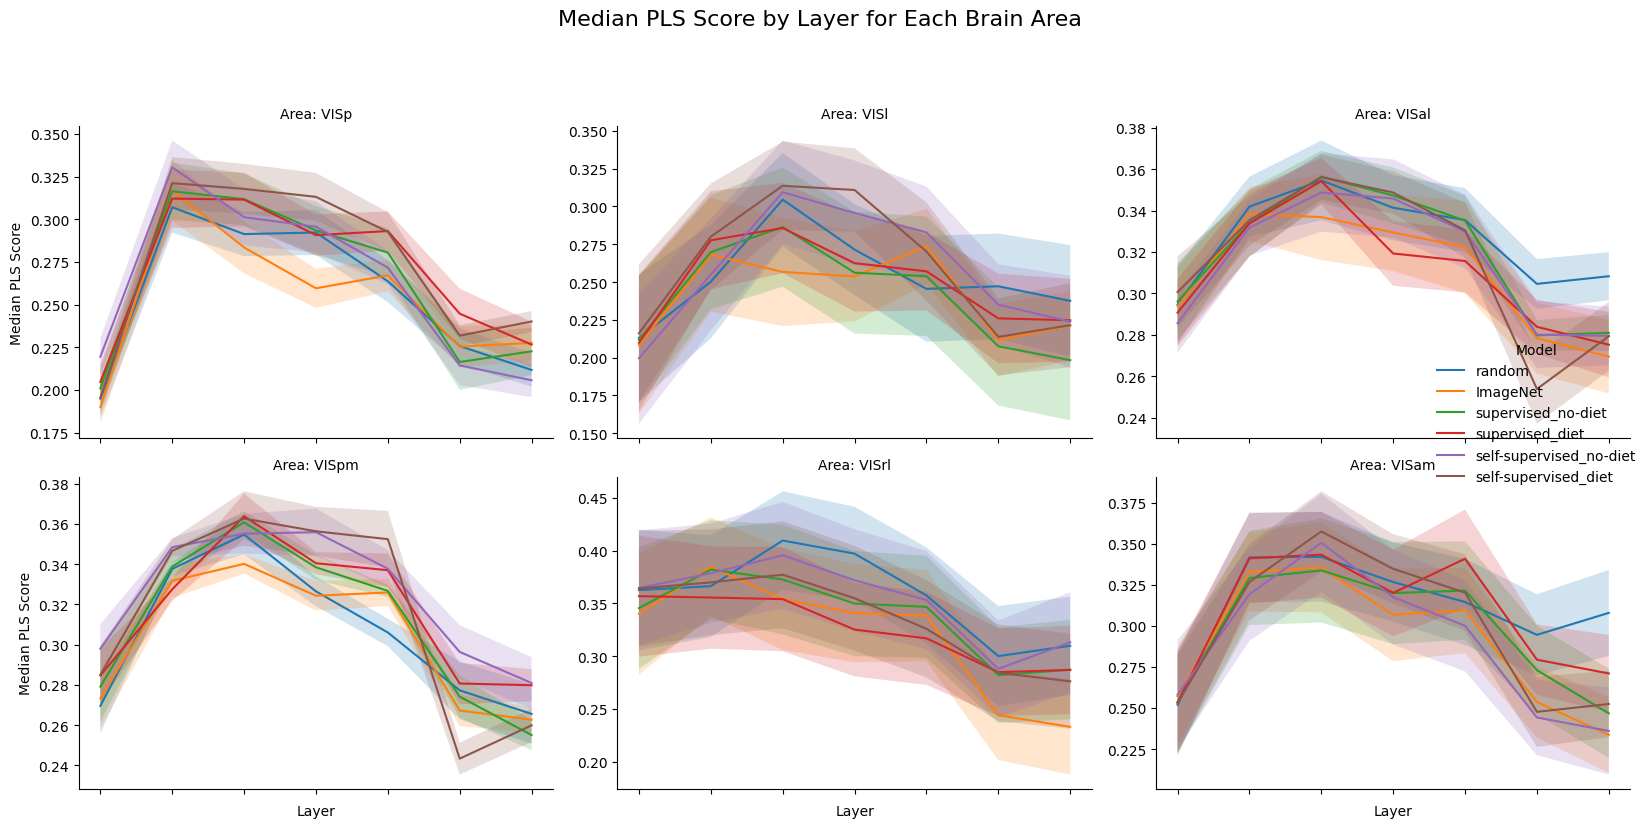

In [16]:
from plotter import plot_comparison_multi

#read from file
median_scores_random = pd.read_pickle("median_scores_random.pkl")
median_scores_inet = pd.read_pickle("median_scores_inet.pkl")
median_scores_inet_no_diet = pd.read_pickle("median_scores_inet_no_diet.pkl")
median_scores_inet_diet = pd.read_pickle("median_scores_inet_diet.pkl")
median_scores_inet_ss_no_diet = pd.read_pickle("median_scores_inet_ss_no_diet.pkl")
median_scores_inet_ss_diet = pd.read_pickle("median_scores_inet_ss_diet.pkl")

plot_comparison_multi([median_scores_random, median_scores_inet, median_scores_inet_no_diet, median_scores_inet_diet, median_scores_inet_ss_no_diet, median_scores_inet_ss_diet], ["random", "ImageNet", "supervised_no-diet", "supervised_diet", "self-supervised_no-diet", "self-supervised_diet"], metric_name=METRIC)
# plot_comparison_multi([median_scores_random], ["random"], metric_name=METRIC)